<a href="https://colab.research.google.com/github/shap0011/machine_learning_fall_2024/blob/main/Z_score_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Z-score**







## Problem statement

The SAT and ACT are standardized tests used for college admissions in the United States. A college provides admission only on the basis of **SAT** and **ACT** scores.

* **SAT** (Scholastic Assessment Test) - Score Range: 400-1600

* **ACT** (American College Testing) - Score Range: 1-36

The college admin decides to give scholarship to the top perfomer. Multiple students who took SAT OR ACT tests applied to this college.

The highest score received from applicants who appeared for SAT was 1350 and the highest score received from applicants who appeared for ACT was 30.

How does the college admin choose the best candidate for the scholarship?


### Reading the Data into the Dataframe

In [1]:
# mount to /content/drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
# load the scores.csv file in dataframe
# score = pd.read_csv("scores.csv")
score = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/scores.csv")
score.head()

,student_id,SATscore,ACTscore
0,1,1018,25
1,2,1218,14
2,3,611,17
3,4,723,14
4,5,541,20


In [4]:
score.describe()

,student_id,SATscore,ACTscore
count,1000.000000,1000.000000,1000.000000
mean,500.500000,1007.460000,20.174000
std,288.819436,204.426007,4.884012
min,1.000000,288.000000,5.000000
25%,250.750000,873.000000,17.000000
50%,500.500000,1010.000000,20.000000
75%,750.250000,1148.000000,24.000000
max,1000.000000,1612.000000,36.000000


### Calculating the mean and standard deviation (parameters) of the SAT score



In [5]:
print('The mean is ',score['SATscore'].mean()),
print('The standard Deviation is ', score['SATscore'].std())

The mean is  1007.46
The standard Deviation is  204.42600713312467


In [6]:
print('The mean is ',score['ACTscore'].mean()),
print('The standard Deviation is ', score['ACTscore'].std())

The mean is  20.174
The standard Deviation is  4.884012446501089


### Plotting the Distribution

It  will help us analyze the shape of the data and visualize the PDF of normal distribution using the parameters (mean (mu) and Standard deviation (sigma)) from the data.

In [7]:
# Import Seaborn for visualization
import seaborn as sns

<ipython-input-8-0d68f775f12e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(score['SATscore'])


<Axes: xlabel='SATscore', ylabel='Density'>

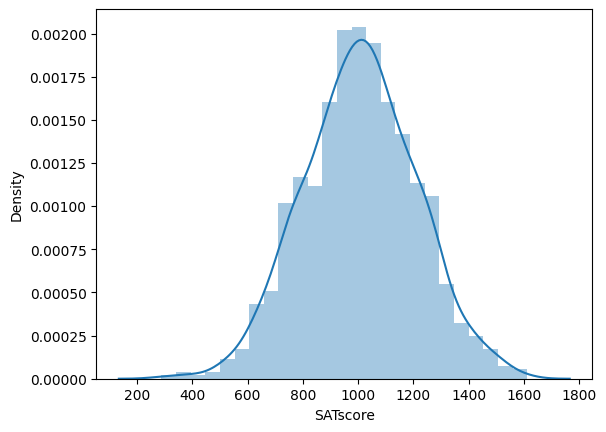

In [8]:
# Plot the distribution of SAT scores
sns.distplot(score['SATscore'])

<ipython-input-9-26cafc883fe4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(score['ACTscore'])


<Axes: xlabel='ACTscore', ylabel='Density'>

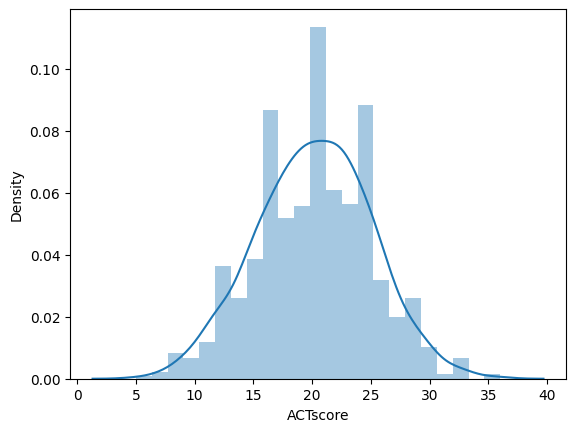

In [9]:
# Plot the distribution of ACT scores
sns.distplot(score['ACTscore'])

# <a name='link4'>**Z- Score (Standardization of Normal Variables)**</a>

We know that the SAT scores are normally distributed with mean 1007 and standard deviation 200 and ACT scores are normally distributed with mean 20 and standard deviation 5.

A normal variable can be converted to standard normal variable by substracting the mean (μ) and dividing the standard deviation (σ)

Z = (X - μ)/σ

In [11]:
# find the Z-score of highest scorer in SAT among all the applicants
satz = (1350 - 1007) / 200
print('The Z-score of highest scorer in SAT among all the applicants is', satz)

The Z-score of highest scorer in SAT among all the applicants is 1.715


In [12]:
# find the Z-score of highest scorer in ACT among all the applicants
actz = (30 - 20) / 5
print('The Z-score of highest scorer in ACT among all the applicants is', actz)

The Z-score of highest scorer in ACT among all the applicants is 2.0


The standardized highest SAT score of the applicant is 1.75 standard deviations above the mean and the standardized highest ACT score of the applicants is 2 standard deviations above the mean.

This means that among the applicants, the highest scorer in ACT performed better than the highest scorer in SAT.

### apply `z_score` to all the scores in the table

In [13]:
# check the table
score.head()

,student_id,SATscore,ACTscore
0,1,1018,25
1,2,1218,14
2,3,611,17
3,4,723,14
4,5,541,20


## Fit - Transform

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
# Initialize the StandardScaler
scaler = StandardScaler()

scaler.fit(score[['SATscore', 'ACTscore']])


StandardScaler()

In [16]:
scaler.mean_

array([1007.46 ,   20.174])

In [17]:
# Fit and transform the SATscore and ACTscore columns
score[['SATscore_z', 'ACTscore_z']] = scaler.transform(score[['SATscore', 'ACTscore']])

In [ ]:
# OR use fit_transform directly
#score[['SATscore_z', 'ACTscore_z']] = scaler.fit_transform(score[['SATscore', 'ACTscore']])


In [18]:
# print the dataframe
score

,student_id,SATscore,ACTscore,SATscore_z,ACTscore_z
0,1,1018,25,0.051585,0.988616
1,2,1218,14,1.030423,-1.264757
2,3,611,17,-1.940352,-0.650201
3,4,723,14,-1.392202,-1.264757
4,5,541,20,-2.282945,-0.035644
...,...,...,...,...,...
995,996,871,17,-0.667862,-0.650201
996,997,752,21,-1.250271,0.169208
997,998,1087,32,0.389284,2.422581
998,999,987,10,-0.100135,-2.084166
